# K-Means Assignment

## Task 1 (Prepare Two test datasets)
Below is a chosen small data set for the application of kmeans clustering.The purpose of the small data set is to ensure understanding of the k means algorithm as the data is small and exhaustible.

The small dataset is suitable as:
1. Kmeans is a distance based form of clustering the grouping of the clusters prevents ambiguity of solution as there is only one optimal solution.
2. There are 3 clear clusters (k=3) so implementing the elbow method to find an optimal k is not necessary.
3. The optimal seeding points i.e, the 3 points required to generate the optimal solution are already known this will mitigate the need to carry out inconsequential test runs.

,x,y
0,1,1
1,2,1
2,10,0
3,9,1
4,10,10
5,9,9


<AxesSubplot: xlabel='x', ylabel='y'>

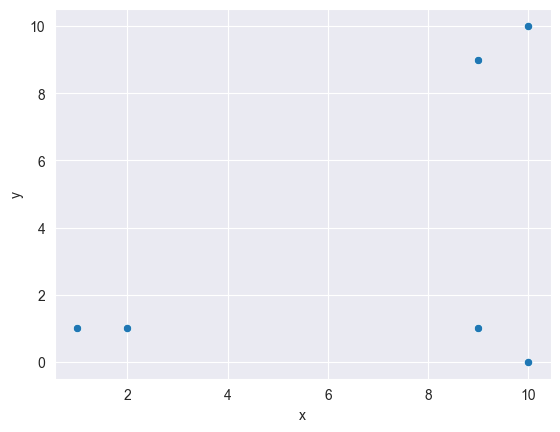

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

small_dataset = pd.DataFrame([[1,1],[2,1],[10,0],[9,1],[10,10],[9,9]],columns=['x','y'])
display(small_dataset)

sns.scatterplot(data=small_dataset,x='x',y='y')

The existing large dataset I have chosen for the implementation task of this assignment is the iris dataset displayed below.This data was acquired from the sklearn library with the following url

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [2]:
iris = pd.read_csv('iris.csv')
display(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Task 2 (Apply on Paper)

1. Pick k centroids (k=3 for this small test set)
&nbsp;
2. Calculate the euclidean distance between each point and each cluster centre (centroid).
&nbsp;
3. Assign each point to a cluster based on the smallest distance to each cluster centre (centroid).
&nbsp;
4. Recalculate centroids of each cluster and repeat steps 2 and 3 till there is no change in the classification. Then calculate the sum of squared errors for this final iteration.
&nbsp;
5. Pick new initial k centroids and repeat the entire process till the smallest sum of squared error is found.

__NB:__
* Exhausting all permutations is tedious and often only has marginal benefits.
&nbsp;
* K is usually shown using the elbow method,plotting the sum of squared errors of each solution k and picking the k which represents the smallest fall in sum of squared errors. For this case k is already known.

### Application on Paper (K=3):

| ID  | x   | y   |
|-----|-----|-----|
| a   | 1   | 1   |
| b   | 2   | 1   |
| c   | 10  | 0   |
| d   | 9   | 1   |
| e   | 10  | 10  |
| f   | 9   | 9   |

Pick 3 centroids at random

| Cluster | Centroids |
|---------|-----------|
| 1       | (1,1)     |
| 2       | (10,0)    |
| 3       | (10,10)   |


Euclidean formula
$$distance = \sqrt{(y_2-y_1)^2 +(x_2-x_1)^2}$$
__Calculating the distance between point a $(1,1)$ and cluster 2$(10,0)$__
$$distance = \sqrt{(0-1)^2 +(10-1)^2}$$
$$distance = \sqrt{1 + 81}$$
$$distance = \sqrt{82}$$
$$distance = 9.1$$


__Finding the distance from every cluster centroid__


| ID  | x   | y   | Distance Cluster 1 | Distance Cluster 2 | Distance Cluster 3 | Assigned Cluster |
|-----|-----|-----|--------------------|--------------------|--------------------|------------------|
| a   | 1   | 1   | 0                  | 9.1                | 12.7               | 1                |
| b   | 2   | 1   | 1                  | 8.1                | 12                 | 1                |
| c   | 10  | 0   | 9.1                | 0                  | 10                 | 2                |
| d   | 9   | 1   | 8                  | 1.4                | 9.1                | 2                |
| e   | 10  | 10  | 12.7               | 10                 | 0                  | 3                |
| f   | 9   | 9   | 11.3               | 9.1                | 1.4                | 3                |

Recalculate the centroid as the average of each cluster

__Example Cluster 1:__
$$\left( \frac{1+2}{2},\frac{1+1}{2} \right)$$
$$(1.5,1)$$


__The new centroids are__

| Cluster | Centroids |
|---------|-----------|
| 1       | (1.5,1)   |
| 2       | (9.5,0.5) |
| 3       | (9.5,9.5) |



__Finding the distance from every cluster centroid and Reassigning Clusters__

| ID  | x   | y   | Distance Cluster 1 | Distance Cluster 2 | Distance Cluster 3 | Assigned Cluster |
|-----|-----|-----|--------------------|--------------------|--------------------|------------------|
| a   | 1   | 1   | 0.5                | 8.5                | 12.0               | 1                |
| b   | 2   | 1   | 0.5                | 7.5                | 11.3               | 1                |
| c   | 10  | 0   | 8.6                | 0.7                | 9.5                | 2                |
| d   | 9   | 1   | 7.5                | 0.7                | 8.5                | 2                |
| e   | 10  | 10  | 12.4               | 9.5                | 0.7                | 3                |
| f   | 9   | 9   | 11.0               | 8.5                | 0.7                | 3                |

As we can see the assigned clusters have not changed therefore the solution has converged for these initial k points.


__Calculating the SSE__

$$SSE = \Sigma\ (euclidean\ distance\ of\ each\ point\ to\ their\ cluster\ centre)^2$$
$$SSE = 0.5^2 + 0.5^2 + 0.7^2 + 0.7^2 + 0.7^2 + + 0.7^2$$
$$SSE = 2.5$$

__The process would then be repeated for new initial clusters but this is already a known optimal solution__

Checking the solution achieved for the created small dataset against the scikit learn implementation. The results corroborate the solution found above. The labels are as shown below

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(small_dataset)

kmeans.labels_

array([1, 1, 0, 0, 2, 2])

The Centroids/cluster centers are shown below

In [4]:
kmeans.cluster_centers_

array([[9.5, 0.5],
       [1.5, 1. ],
       [9.5, 9.5]])

The SSE is shown below

In [5]:
kmeans.inertia_

2.5

## Task 3 (Creating a test harness using sci-kit learn)

__Unit Tests__
* The unit tests will be on the implementation of a points picker which outputs a list of possible starting permutations based on the input data set.

* The second unit test will be on an algorithm that calculates the euclidean distance for each point and each centroid/cluster centre and assigns each point to the correct cluster.

* The Third unit test will be on an algorithm for the appropriate means of calculating the SSE (sum squared error).

The unit tests will use the small dataset and the previously found solutions in task 2

__Implementation Test__
The Implementation test harness is shown below for labels,centroids and SSE. It is comparing the results of the implementation to the results ascertained from the sci-kit learn library.

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Below is the test harness cluster centers/centroids

In [26]:
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Below is the test harness SSE

In [8]:
print(kmeans.inertia_)

78.851441426146


## Task 4 (Implementation of K means)

__Unit testing the seed generator.__
Checking it calculates a list of possible seeds. given k as an input and the data in the form of a data frame. The output should be in the form of a list of possible seeds.

In [9]:
k=3
n = small_dataset.index

from itertools import combinations,islice
combi = list(islice(combinations(n,k),20000))
combi

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 5),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

__Unit testing the Clustered function.__
Checking that it outputs a dataframe with an extra column for the assigned cluster appropriate with the centroid. From the result below we can see this operates as expected.

In [10]:
from scipy.spatial.distance import euclidean
cluster = []
initial_len=small_dataset.shape[1]
centroids = pd.DataFrame([[1.5,1],[9.5,0.5],[9.5,9.5]])

for j in range(0,len(small_dataset)):
    smallest_distance = {i:euclidean(u=small_dataset.iloc[j,0:initial_len],v=centroids.iloc[i,0:initial_len]) for i in range(0,len(centroids))}
    cluster.append(min(smallest_distance,key=smallest_distance.get))

s = small_dataset.assign(Cluster = cluster)
s

,x,y,Cluster
0,1,1,0
1,2,1,0
2,10,0,1
3,9,1,1
4,10,10,2
5,9,9,2


__Unit Testing the SSE calculator of the Kmeans__
The expected SSE for the solution was 2.5 and the resulting SSE was 2.5 shown below

In [11]:
SSE = []

for j in range(0,k):
    error = [(euclidean(u=s.loc[s.Cluster == j].reset_index(drop=True).drop(['Cluster'],axis=1).iloc[i],v=centroids.iloc[j]))**2 for i in range(0,len(s.loc[s.Cluster == j]))]
    error = sum(error)
    SSE.append(error)

e = round(sum(SSE),3)
e

2.5

__Implementing the full Kmeans Algorithm.__

In [12]:
class Cluster:
    def __init__(self):
        pass

    def Kmeans(self,data,k:int,no_iterations=10,no_seeds=10):
        """
        This method carries out the kmeans implementation by
        iteratively assigning each data object to a cluster
        based on euclidean distances.It repeats this process
        for a specified number of seeds and a specified number of
        iterations keeping only the best found solution by comparing
        each solution SSE to the found optimal.
        """
        sample = data
        sample = sample.reset_index(drop=True)

        def points_picker():
            """
            This function creates a list of seeds
            for picking starting centroids/cluster centre.
            """
            n = sample.index
            from itertools import combinations,islice
            combi = list(islice(combinations(n,k),20000))
            return combi

        def clustered():
            """
            This function calculates the euclidean distance
            between each point and all centroids. Then assigns
            each point based on the closest centroid or cluster
            centre.
            """
            from scipy.spatial.distance import euclidean
            cluster = []

            for j in range(0,len(sample)):
                smallest_distance = {i:euclidean(u=sample.iloc[j,0:initial_len],v=centroids.iloc[i,0:initial_len]) for i in range(0,len(centroids))}
                cluster.append(min(smallest_distance,key=smallest_distance.get))

            s = sample.assign(Cluster = cluster)
            return s

        from scipy.spatial.distance import euclidean
        t = points_picker()

        initial_len = sample.shape[1]
        min_sse = 1000

        for m in range(0,len(t),int(len(t)/no_seeds)):
            SSE = []
            centroids = sample.iloc[list(t[m])]

            for i in range(0,no_iterations):
                sample = clustered()
                centroids = sample.groupby('Cluster').mean()

            for j in range(0,k):
                error = [(euclidean(u=sample.loc[sample.Cluster == j].reset_index(drop=True).drop(['Cluster'],axis=1).iloc[i],v=centroids.iloc[j]))**2 for i in range(0,len(sample.loc[sample.Cluster == j]))]
                error = sum(error)
                SSE.append(error)

            e = round(sum(SSE),3)

            if e < min_sse:
                min_sse = e
                solution = sample
                solution_centroids = centroids

        return solution,min_sse,solution_centroids

Below is the Implementing of an elbow diagram in order to find a suitable k.

<AxesSubplot: xlabel='k', ylabel='Sum of squared errors'>

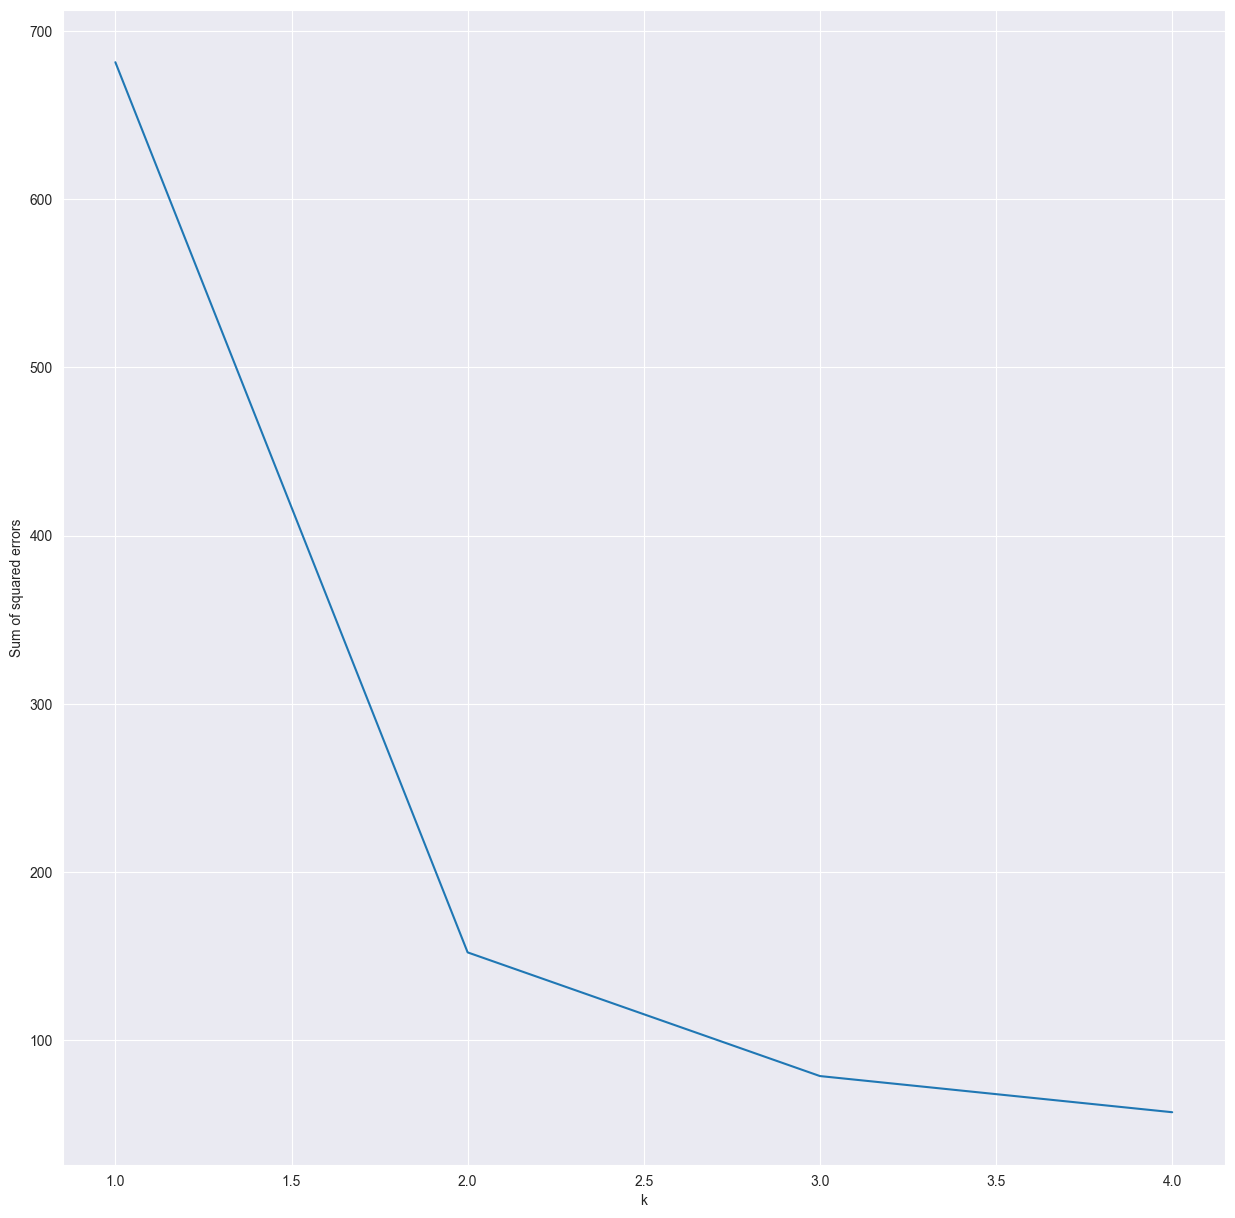

In [13]:
elbow_k = [1,2,3,4]
elbow_error = []

for k in elbow_k:
    clustered_data,sum_square_error,cent = Cluster().Kmeans(data=iris,k=k,no_iterations=10,no_seeds=3)
    elbow_error.append(sum_square_error)

plt.figure(figsize=(15,15))
plt.xlabel('k')
plt.ylabel('Sum of squared errors')
sns.lineplot(x=elbow_k,y=elbow_error)

From the above elbow diagram the optimal cluster choice is 3 therefore k=3. The other Kmeans arguments were chosen by user

In [14]:
clustered_data,sum_square_error,cent = Cluster().Kmeans(data=iris,k=3,no_iterations=10,no_seeds=20)

## Comparing the results of the implementation to the harness

__Comparing the centroids__

In [15]:
cent

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster,,,,
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [27]:
harness_centroids = pd.DataFrame(kmeans.cluster_centers_,columns=list(kmeans.feature_names_in_))
harness_centroids

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


__Comparing the Sum squared error__

In [28]:
display(round(kmeans.inertia_,3))

display(sum_square_error)

78.851

78.851

__Comparing the Accuracy of the implementation against the test harness__

In [29]:
import numpy as np
s=np.array(clustered_data.Cluster)
s

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [30]:
harness=pd.Series(kmeans.labels_)
harness_adj = harness.replace(to_replace=[0,1,2],value=[1,0,2])
harness_adj = np.array(harness_adj)
harness_adj

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [31]:
accuracy = (len(s[s==harness_adj])/len(s))*100
print(f'The accuracy of the implemented kmeans relative to the library version is {accuracy}%')

The accuracy of the implemented kmeans relative to the library version is 100.0%


### Assumptions & Limitations
* The input to the kmeans function has to be in the form of a pandas dataframe.
* With most distance based clustering the assumption is that the user applies some form of scaling technique to maximize the accuracy because axis scaling greatly effects the quality of clustering.
* The method for picking cluster centroids is random and limited by the number of seeds.
* User has some prior knowledge of kmeans and understands the trade-off between iterations and the number of seeds.
* The number of permutations available for seeding is limited.

### O(n) Complexity:
The $O(n)$ complexity is $O(2^n)$ this is due to the method used to generate seeds based on combination mathematics (This has been limited to minimize memory usage) other parts of the function are limited by user input functions for the number of iterations and the number of seeds.

# Task 5 Visualization

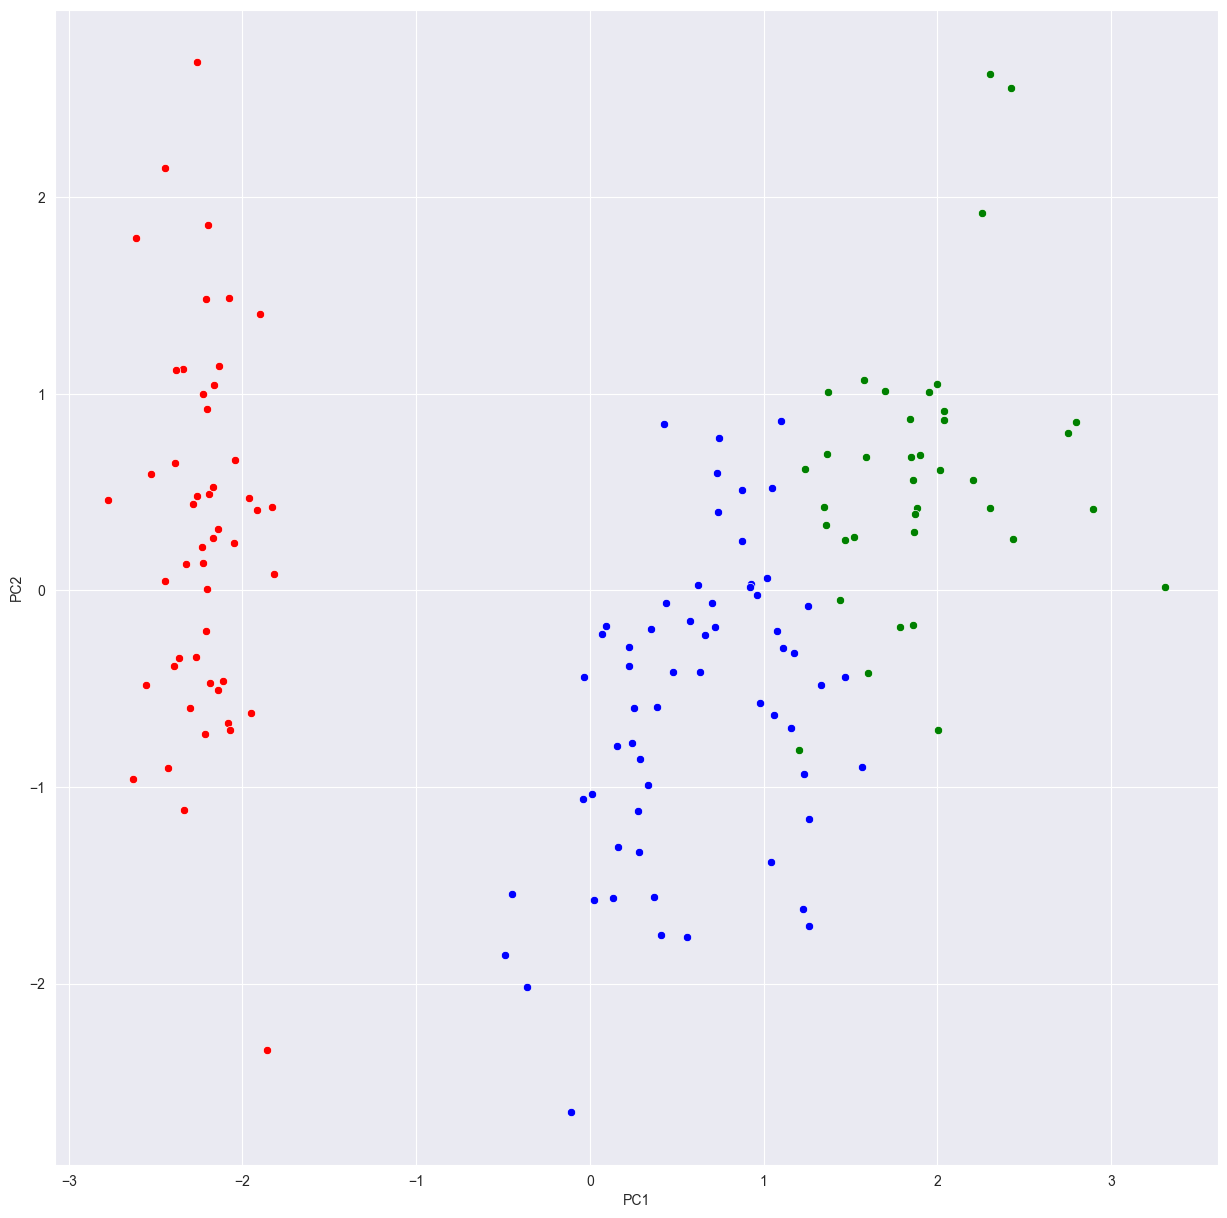

In [32]:
y_label = clustered_data['Cluster']
X = clustered_data.drop(['Cluster'],axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

proj = pca.transform(X)
proj = pd.DataFrame(proj,columns=['PC1','PC2'])
proj = pd.concat([proj,y_label],axis=1)

colors = {0:'red',1:'blue',2:'green'}
label_type = [0,1,2]

plt.figure(figsize=(15,15))
plt.xlabel('PC1')
plt.ylabel('PC2')

for type in label_type:
    d = proj.loc[proj.Cluster == type]
    sns.scatterplot(x=d['PC1'],y=d['PC2'],color = colors[type])